# Load libraries

In [198]:
import numpy as np
import pandas as pd
import os
from datetime import datetime
import re


# Specify git executable file for GitPython in Jupyter Notebook (In IDE, it can still work without this line.)
os.environ["GIT_PYTHON_GIT_EXECUTABLE"] = "C:\Program Files\Git\cmd\git.exe"

import git
from git import RemoteProgress

from git import Repo
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Clone repo from GitHub

Link: https://git-scm.com/docs/git-clone <br>
<b>Note:</b> In case too-long file path issue occurs in Windows, set <code>git config --system core.longpaths true</code>

In [199]:
class Progress(RemoteProgress):
    def update(self, op_code, cur_count, max_count=None, message=''):
        print(self._cur_line)

In [200]:
#remote_link = "https://github.com/phpmyadmin/phpmyadmin"
local_link = "camel"
# Uncomment to clone
# Repo.clone_from(remote_link, local_link, progress=Progress())

In [201]:
repo = Repo(local_link)
fixing_commit = "24eefa559fe6b310629d2bf00663d2679ec81b9"
affected_file = "camel-core/src/main/java/org/apache/camel/processor/validation/ValidatingProcessor.java"

# A) Show info of a commit
Link: https://git-scm.com/docs/git-show
You can explore different parameters.

In [202]:
show_data = repo.git.show("-s", fixing_commit).splitlines()
for line in show_data:
    print(line)

commit 24eefa559fe6b310629d2bf00663d2679ec81b96
Author: Claus Ibsen <claus.ibsen@gmail.com>
Date:   Mon Apr 16 10:55:24 2018 +0200

    CAMEL-12444: Improved DTD handling in validator component.


# B) Show total files affected in the fixing commit

In [203]:
show_total_files_affected = repo.git.show ("--stat", fixing_commit).splitlines()
for line in show_total_files_affected:
    print(line)

commit 24eefa559fe6b310629d2bf00663d2679ec81b96
Author: Claus Ibsen <claus.ibsen@gmail.com>
Date:   Mon Apr 16 10:55:24 2018 +0200

    CAMEL-12444: Improved DTD handling in validator component.

 .../org/apache/camel/processor/validation/SchemaReader.java |  1 +
 .../camel/processor/validation/ValidatingProcessor.java     | 13 +++++++++++++
 2 files changed, 14 insertions(+)


# C) Show total directories affected in the fixing commit

In [204]:
show_total_directories_affected = repo.git.show ("--dirstat", fixing_commit).splitlines()
for line in show_total_directories_affected:
    print(line)

commit 24eefa559fe6b310629d2bf00663d2679ec81b96
Author: Claus Ibsen <claus.ibsen@gmail.com>
Date:   Mon Apr 16 10:55:24 2018 +0200

    CAMEL-12444: Improved DTD handling in validator component.

 100.0% camel-core/src/main/java/org/apache/camel/processor/validation/


# D) Show total lines of code deleted including comments and blank lines

In [246]:
show_total_lines_deleted = repo.git.show ("--shortstat", fixing_commit).splitlines()
show_total_lines_deleted.reverse()
show_total_lines_deleted = show_total_lines_deleted[0].split(',') 
print(show_total_lines_deleted[1])

 14 insertions(+)


# E) Show total lines of code added including comments and blank lines

In [216]:
show_total_lines_added = repo.git.show ("--shortstat", fixing_commit).splitlines()
show_total_lines_added.reverse()
show_total_lines_added = show_total_lines_added[0].split(',') 
print(show_total_lines_added[1])

 14 insertions(+)


# F) Show total lines of code deleted excluding comments and blank lines

In [219]:
show_total_lines_deleted = repo.git.show("-U0","--pretty=""",fixing_commit).splitlines()
temp_line_deleted = []
t_l_deleted = 0
for line in show_total_lines_deleted:
    if re.search("^\-",line):
        l = line.split(" ")
        if(len(l) > 1):
            if(len(l[0])==1):
                if(l[1][:1] != '*' or l[1][:1] !='/'):
                    print(line)
                    t_l_add += 1
print("Total lines of code deleted excluding comments and blank lines = "+ str(t_l_deleted))
            

Total lines of code deleted excluding comments and blank lines = 0


# G) Show total lines of code added excluding comments and blank lines

In [220]:
show_total_lines_add = repo.git.show("-U0","--pretty=""",fixing_commit).splitlines()
temp_line_add = []
t_l_add = 0
for line in show_total_lines_add:
    if re.search("^\+",line):
        l = line.split(" ")
        if(len(l) > 1):
            if(len(l[0])==1):
                if(l[1][:1] != '*' or l[1][:1] !='/'):
                    print(line)
                    t_l_add += 1
print("Total lines of code added excluding comments and blank lines = "+ str(t_l_add))
            

+                LOG.debug("Configuring SchemaFactory to not allow access to external DTD/Schema");
+        // turn off access to external schema by default
+        if (!Boolean.parseBoolean(exchange.getContext().getGlobalOptions().get(ACCESS_EXTERNAL_DTD))) {
+            try {
+                LOG.debug("Configuring Validator to not allow access to external DTD/Schema");
+                validator.setProperty(XMLConstants.ACCESS_EXTERNAL_DTD, "");
+                validator.setProperty(XMLConstants.ACCESS_EXTERNAL_SCHEMA, "");
+            } catch (SAXException e) {
+                LOG.warn(e.getMessage(), e);
+            }
+        }
Total lines of code added excluding comments and blank lines = 11


# H) Days between current fixing commit and previous commit of each affected file

In [150]:
date_diff = repo.git.log ("--format=%cd",fixing_commit,"--",affected_file,"-2").splitlines()
currentdate = datetime.strptime(date_diff[0],"%a %b %d %X %Y %z")
previousdate= datetime.strptime(date_diff[1],"%a %b %d %X %Y %z")
datediff = (abs(currentdate-previousdate).days)
print("Days between current fixing commit and previous commit of each affected file:"+str(datediff))

Days between current fixing commit and previous commit of each affected file:822


# I)  no.of.times each affected file of the current fixing commit been modified in the past time since their creation

In [151]:
no_of_times = repo.git.log ("--format=%cd", fixing_commit,"--",affected_file,"--follow").splitlines()
print(len(no_of_times))

32


# J) Developers have modified each affected file since its creation

In [249]:
no_of_developers = repo.git.log ("--follow","--format=%an",fixing_commit,"--",affected_file).splitlines()
developers= set(no_of_developers)
num=1
for line in developers:
        print(num,line)
        num=num+1
        

1 Willem Jiang
2 Roman Kalukiewicz
3 Hiram R. Chirino
4 Hadrian Zbarcea
5 Babak Vahdat
6 Franz Forsthofer
7 James Strachan
8 Willem Ning Jiang
9 Christian Mueller
10 Claus Ibsen
11 cmueller


# K) For each developer identified, no.of.commits have each of them submitted

In [228]:
commit_developers = repo.git.shortlog("-s","-n","--no-merges",fixing_commit,"--",affected_file).splitlines()
developer_commits = []
for line in commit_developers:
    commit, developer = line.split("\t")
    developer_commits.append([int(commit),developer])

In [230]:
df = pd.DataFrame(developer_commits, columns=['commit','Developer'])

In [231]:
df.head()

,commit,Developer
0,17,Claus Ibsen
1,3,James Strachan
2,2,Babak Vahdat
3,2,Willem Jiang
4,2,Willem Ning Jiang


# Show all developers across all branches
Link: https://git-scm.com/docs/git-shortlog

In [223]:
commit_authors = repo.git.shortlog("-sne", "--all").splitlines()

author_commits = []

for commit_author in commit_authors:
    commit, author = commit_author.split("\t")
    author_commits.append([int(commit), author])

In [8]:
df = pd.DataFrame(author_commits, columns=['Commit', 'Author'])

In [9]:
df.head()

,Commit,Author
0,17014,Claus Ibsen <davsclaus@apache.org>
1,7802,Andrea Cosentino <ancosen@gmail.com>
2,3601,Willem Ning Jiang <ningjiang@apache.org>
3,2640,Claus Ibsen <claus.ibsen@gmail.com>
4,1918,Willem Jiang <willem.jiang@gmail.com>


## Top 10 most active developers in the project

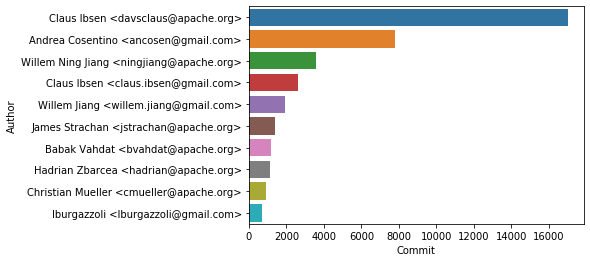

In [144]:
sns.barplot(y='Author', x="Commit", data=df[:10])

# Code changes between 2 commits
<b>Note:</b> Watch out for the initial commit (no parent commit)

In [11]:
diff_data = repo.git.diff(fixing_commit + "^", fixing_commit).splitlines()
for line in diff_data:
    print(line)

diff --git a/camel-core/src/main/java/org/apache/camel/processor/validation/SchemaReader.java b/camel-core/src/main/java/org/apache/camel/processor/validation/SchemaReader.java
index ac42cc906a9..c77aea0cb35 100644
--- a/camel-core/src/main/java/org/apache/camel/processor/validation/SchemaReader.java
+++ b/camel-core/src/main/java/org/apache/camel/processor/validation/SchemaReader.java
@@ -175,6 +175,7 @@ public class SchemaReader {
         }  
         if (camelContext == null || !Boolean.parseBoolean(camelContext.getGlobalOptions().get(ACCESS_EXTERNAL_DTD))) {
             try {
+                LOG.debug("Configuring SchemaFactory to not allow access to external DTD/Schema");
                 factory.setProperty(XMLConstants.ACCESS_EXTERNAL_DTD, "");
             } catch (SAXException e) {
                 LOG.warn(e.getMessage(), e);
diff --git a/camel-core/src/main/java/org/apache/camel/processor/validation/ValidatingProcessor.java b/camel-core/src/main/java/org/apache/camel/proc

# Identify the last commit that changes a line modified in the current commit

Link: https://git-scm.com/docs/git-blame

In [12]:
blame_data = repo.git.blame("-L113,+1", fixing_commit + "^", "--", affected_file).splitlines()
for line in blame_data:
    print(line)

72348dfff3b8 (Claus Ibsen 2012-10-17 16:39:53 +0000 113)                     source = getSource(exchange, is);


# Show all the commit history between two commits

Link: https://git-scm.com/docs/git-log <br> Watch out for initial commit (no parent commit)

In [13]:
last_commit = blame_data[0].strip().split()[0]
log_data = repo.git.log("--oneline", last_commit + ".." + fixing_commit + "^").splitlines()
print("Number of commits in between:", len(log_data))

Number of commits in between: 19097


In [14]:
log_data

['750c8e42d44 CAMEL-12441: Fixed splitter in parallel and streaming mode may block if iterator next throws exception on first call. Thanks to Bodor Maria Mihaela for reporting and reproducer sample project.',
 '06032e7d01e fusedoc-1940 updates to CXF component doc',
 'd81f88126e7 CAMEL-12395: Fixed issue with cookie headers on http producer. Thanks to Kevin Brooks for the patch.',
 'a8e1f11b0cf CAMEL-12424: Fixed set charset from content-type if there are values after it. Thanks to Fabricio Guimarães Pellegrini for the patch.',
 '4d294179203 CAMEL-12439: FailedToCreateRouteException should mask sensitive information in uris',
 '7254457e799 CAMEL-12436: Fix Undertow to extract body message from PATCH request',
 "e5fa508b38a Added test for custom component which uses a backing service which furthermore sends data to a further Camel route asynchronously. As the processing route was a single consumer thread it couldn't process new tasks issued to it till the further task was finished leadi